   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19          15000              39
1           2    Male   21          15000              81
2           3  Female   20          16000               6
3           4  Female   23          16000              77
4           5  Female   31          17000              40


\\?\C:\Users\imtan\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


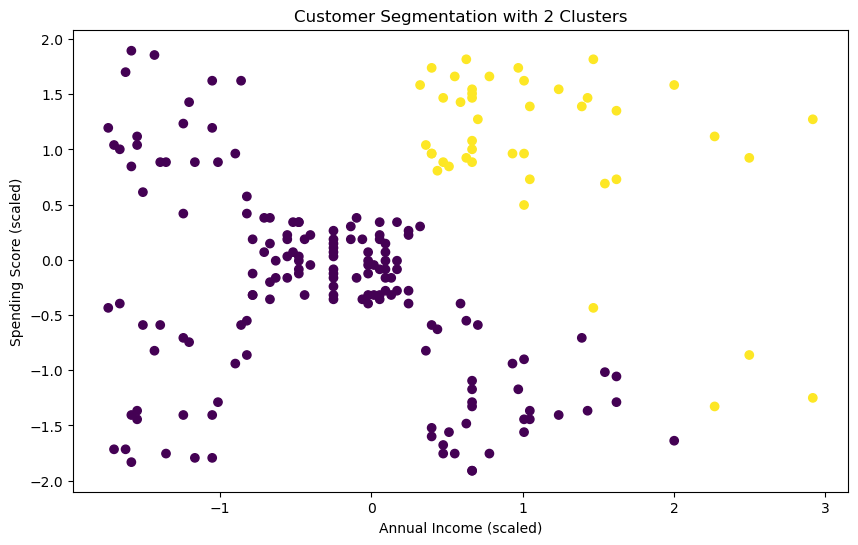


Explanation of the 2 clusters:
Cluster 0:
Number of customers: 157
Average Annual Income: 52579.61783439491
Average Spending Score: 42.904458598726116

Cluster 1:
Number of customers: 43
Average Annual Income: 89697.67441860466
Average Spending Score: 76.83720930232558



\\?\C:\Users\imtan\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


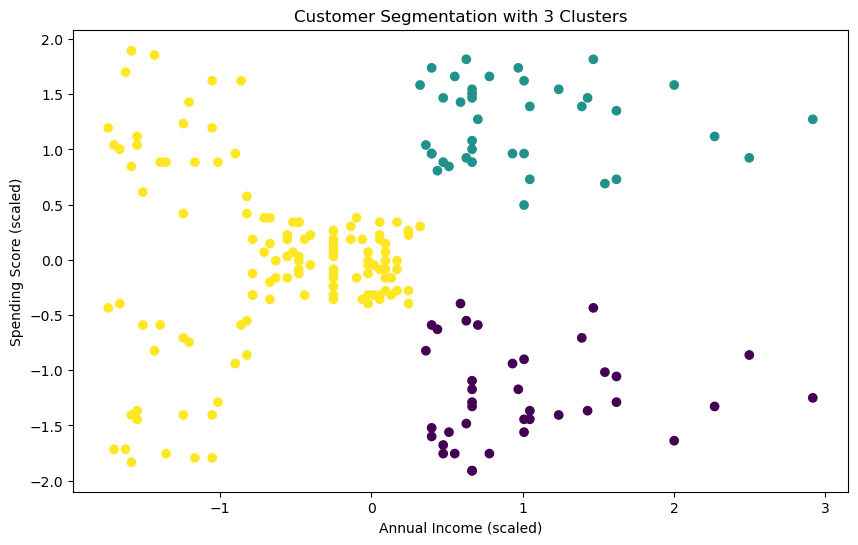


Explanation of the 3 clusters:
Cluster 0:
Number of customers: 38
Average Annual Income: 87000.0
Average Spending Score: 18.63157894736842

Cluster 1:
Number of customers: 39
Average Annual Income: 86538.46153846153
Average Spending Score: 82.12820512820512

Cluster 2:
Number of customers: 123
Average Annual Income: 44154.471544715445
Average Spending Score: 49.829268292682926



In [1]:
# let us import now
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Let us load the data set
# Replace 'path_to_file' with the actual path to your dataset file
data = pd.read_excel(r'C:\Users\imtan\Desktop\FYE_data.xlsx')

# show the first few rows of the data sets
print(data.head())

# two of the variables to segment the customers into 2 clusters are 'Annual Income' and 'Spending Score'.

# Extracting the relevant columns
X = data[['Annual Income', 'Spending Score']]

# Scaling the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing K means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster_2'] = kmeans.fit_predict(X_scaled)

# Let us draw tje scatter plot for 2 clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster_2'], cmap='viridis')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segmentation with 2 Clusters')
plt.show()

# Explantion of the 2 clusters
print("\nExplanation of the 2 clusters:")
for cluster in range(2):
    print(f"Cluster {cluster}:")
    cluster_data = data[data['Cluster_2'] == cluster]
    print(f"Number of customers: {len(cluster_data)}")
    print(f"Average Annual Income: {cluster_data['Annual Income'].mean()}")
    print(f"Average Spending Score: {cluster_data['Spending Score'].mean()}\n")

# With usage of the  two variable to create 3 clusters, K-Means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
data['Cluster_3'] = kmeans_3.fit_predict(X_scaled)

# Scatter plot for 3 clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster_3'], cmap='viridis')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segmentation with 3 Clusters')
plt.show()

# Explanation of the 3 clusters
print("\nExplanation of the 3 clusters:")
for cluster in range(3):
    print(f"Cluster {cluster}:")
    cluster_data = data[data['Cluster_3'] == cluster]
    print(f"Number of customers: {len(cluster_data)}")
    print(f"Average Annual Income: {cluster_data['Annual Income'].mean()}")
    print(f"Average Spending Score: {cluster_data['Spending Score'].mean()}\n")